***
# &nbsp;
<font size="6" color="#00A0B2"  face="verdana"> <B>Pandas crosstab</B></font>
***

Pandas offers several options for grouping and summarizing data but this variety of options can be a blessing and a curse. These approaches are all powerful data analysis tools but it can be confusing to know whether to use a groupby , pivot_table or crosstab to build a summary table

The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear. For a quick example, this table shows the number of two or four door cars manufactured by various car makers:

In [1]:
from IPython.display import Image

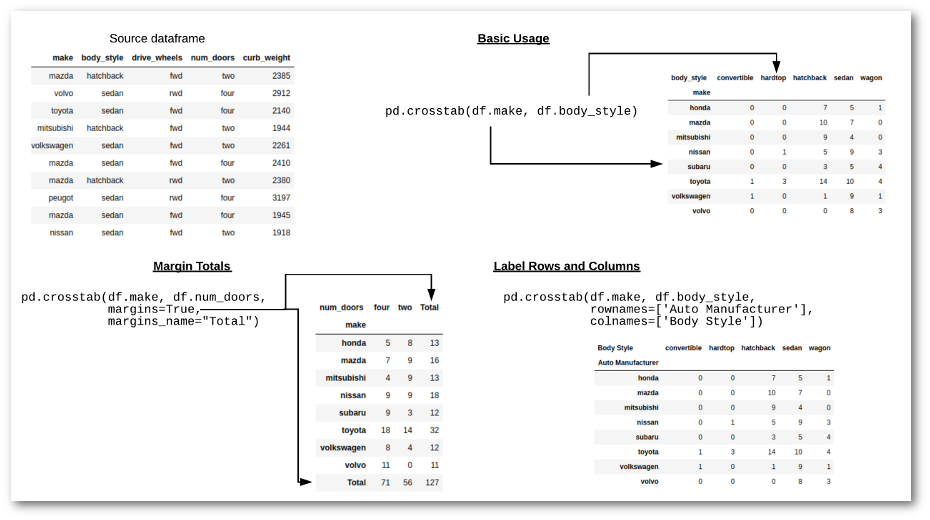

In [2]:
Image(filename = "C:\\Users\\NEONARD\\Documents\\python projects\\Learning data analysis\\images\\crosstab_cheatsheet_header.png" )

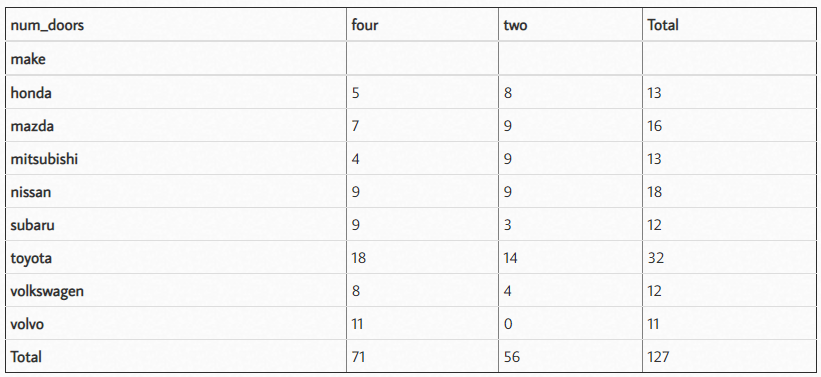

In [21]:
Image(filename = "C:\\Users\\NEONARD\\Documents\\python projects\\Learning data analysis\\images\\capture.png" )

In the table above, you can see that the data set contains 32 Toyota cars of which 18 are four door and 14 are two door. This is a relatively simple table to interpret and illustrates why this approach can be a powerful way to summarize large data sets.

Pandas makes this process easy and allows us to customize the tables in several different manners. 

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np

In [24]:
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine',
            'Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine'],
    'Exam':['Semester 1','Semester 1','Semester 1','Semester 1','Semester 1','Semester 1',
            'Semester 2','Semester 2','Semester 2','Semester 2','Semester 2','Semester 2'],
     
    'Subject':['Mathematics','Mathematics','Mathematics','Science','Science','Science',
               'Mathematics','Mathematics','Mathematics','Science','Science','Science'],
   'Result':['Pass','Pass','Fail','Pass','Fail','Pass','Pass','Fail','Fail','Pass','Pass','Fail']}
 
df = pd.DataFrame(d,columns=['Name','Exam','Subject','Result'])
df

,Name,Exam,Subject,Result
0,Alisa,Semester 1,Mathematics,Pass
1,Bobby,Semester 1,Mathematics,Pass
2,Cathrine,Semester 1,Mathematics,Fail
3,Alisa,Semester 1,Science,Pass
4,Bobby,Semester 1,Science,Fail
5,Cathrine,Semester 1,Science,Pass
6,Alisa,Semester 2,Mathematics,Pass
7,Bobby,Semester 2,Mathematics,Fail
8,Cathrine,Semester 2,Mathematics,Fail
9,Alisa,Semester 2,Science,Pass


In [29]:
# 2 way cross table
 
pd.crosstab(df.Subject, df.Result,margins=True, margins_name = "Total")

Result,Fail,Pass,Total
Subject,,,
Mathematics,3,3,6
Science,2,4,6
Total,5,7,12


margin=True displays the row wise and column wise sum of the cross table  so the output will be

In [27]:
# 3 way cross table

# We will calculate the cross table of subject, Exam and result as shown below
 
pd.crosstab([df.Subject, df.Exam],df.Result, margins=True)

Result                  Fail  Pass  All
Subject     Exam                       
Mathematics Semester 1     1     2    3
            Semester 2     2     1    3
Science     Semester 1     1     2    3
            Semester 2     1     2    3
All                        5     7   12

## DATASET 2

In [18]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['infantry', 'infantry', 'cavalry', 'cavalry', 'infantry', 'infantry', 'cavalry', 'cavalry','infantry', 'infantry', 'cavalry', 'cavalry'], 
        'experience': ['veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie','veteran', 'rookie', 'veteran', 'rookie'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'experience', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,experience,name,preTestScore,postTestScore
0,Nighthawks,infantry,veteran,Miller,4,25
1,Nighthawks,infantry,rookie,Jacobson,24,94
2,Nighthawks,cavalry,veteran,Ali,31,57
3,Nighthawks,cavalry,rookie,Milner,2,62
4,Dragoons,infantry,veteran,Cooze,3,70
5,Dragoons,infantry,rookie,Jacon,4,25
6,Dragoons,cavalry,veteran,Ryaner,24,94
7,Dragoons,cavalry,rookie,Sone,31,57
8,Scouts,infantry,veteran,Sloan,2,62
9,Scouts,infantry,rookie,Piger,3,70


### Create a crosstab table by company and regiment
Counting the number of observations by regiment and category

In [19]:
pd.crosstab(df.regiment, df.company, margins=True)

company,cavalry,infantry,All
regiment,,,
Dragoons,2,2,4
Nighthawks,2,2,4
Scouts,2,2,4
All,6,6,12


Create a crosstab of the number of rookie and veteran cavalry and infantry soldiers per regiment

In [20]:
pd.crosstab([df.company, df.experience], df.regiment,  margins=True)

regiment             Dragoons  Nighthawks  Scouts  All
company  experience                                   
cavalry  rookie             1           1       1    3
         veteran            1           1       1    3
infantry rookie             1           1       1    3
         veteran            1           1       1    3
All                         4           4       4   12